# Wine Quality Analysis

## 1. Goal
Explore how wine price relates to quality (points) and identify high-value wines
using simple, reproducible analysis.

## 2. Setup

In [1]:
import sys
from pathlib import Path

# Get project root
PROJECT_DIR = Path.cwd().parents[0]
SRC_DIR = PROJECT_DIR / "src"
sys.path.insert(0, str(SRC_DIR))
print("Project root:", PROJECT_DIR)
print("Source dir:", SRC_DIR)

Project root: D:\PythonProjects\wine-analysis
Source dir: D:\PythonProjects\wine-analysis\src


In [2]:
from wine_analysis.clean import make_valid
from wine_analysis import questions as q

## 3. Load & Clean Data

In [3]:
import pandas as pd
from wine_analysis.config import DATA_PATH

reviews = pd.read_csv(DATA_PATH, index_col=0)
valid = make_valid(reviews)
print("reviews:", reviews.shape)
print("valid:", valid.shape)
valid.head()

reviews: (129971, 13)
valid: (120975, 15)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,point_price,log_price
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,5.800000,1.176091
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,6.214286,1.146128
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,6.692308,1.113943
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,1.338462,1.812913
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,5.800000,1.176091


## 4. Key Findings
Below are key numeric results and short tables answering the main questions.

In [4]:
# Correlation analysis
corr_price = q.corr_price_points(valid, col="price")
corr_log_price = q.corr_price_points(valid, col="log_price")

if pd.notna(corr_price):
    print(f"Correlation (price vs points): {corr_price:.3f}")
    print(f"Correlation (log_price vs points): {corr_log_price:.3f}")
else:
    print(f"Correlation (price vs points): NaN")
    print(f"Correlation (log_price vs points): NaN")
    

Correlation (price vs points): 0.416
Correlation (log_price vs points): 0.612


In [5]:
#Top wines
top = q.top_by_points(valid, n=6)
top

,country,title,price,points
0,US,Charles Smith 2006 Royal City Syrah (Columbia ...,80.0,100
1,France,Château Léoville Barton 2010 Saint-Julien,150.0,100
2,Italy,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,210.0,100
3,Italy,Biondi Santi 2010 Riserva (Brunello di Montal...,550.0,100
4,France,Château Lafite Rothschild 2010 Pauillac,1500.0,100
5,France,Château Cheval Blanc 2010 Saint-Émilion,1500.0,100


In [6]:
#Sweet spot
sweet = q.sweet_spot(valid, min_point=88, max_price=25, n=9)
sweet

,title,country,price,points,point_price
0,Rulo 2007 Syrah (Columbia Valley (WA)),US,20.0,96,4.800000
1,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,US,20.0,95,4.750000
2,Alain Brumont 2010 Château Bouscassé Red (Madi...,France,20.0,95,4.750000
3,Januik 2012 Bacchus Vineyard Riesling (Columbi...,US,20.0,95,4.750000
4,Poet's Leap 2009 Riesling (Columbia Valley (WA)),US,20.0,95,4.750000
5,EOS 2006 Tears of Dew Late Harvest Moscato (Pa...,US,22.0,95,4.318182
6,Sineann 2013 Riesling (Oregon),US,24.0,95,3.958333
7,La Clarine Farm 2011 Cedarville Mourvèdre (Sie...,US,24.0,95,3.958333
8,Julien Schaal 2016 Kastelberg Grand Cru Schist...,France,25.0,95,3.800000


## 5. Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

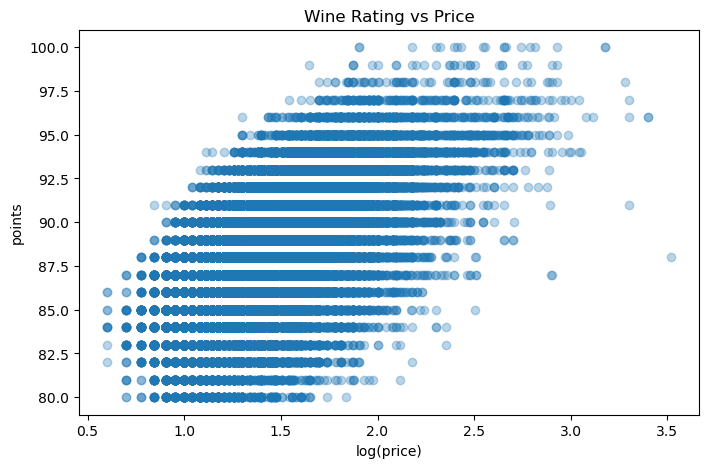

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(valid["log_price"], valid["points"], alpha=0.3)
plt.xlabel("log(price)")
plt.ylabel("points")
plt.title("Wine Rating vs Price")
plt.show

## Conclusions

Based on the analysis of the Wine Reviews dataset, several insights can be drawn:

- The correlation between wine price and rating is **positive but relatively weak**.
- Using a logarithmic price scale slightly improves the correlation.
- Several wines achieve **high ratings at moderate prices**, forming a clear “sweet spot”.
- Quality tends to plateau beyond a certain price level.

Overall, this analysis shows that **good wines do not have to be expensive**.
